# Machine Learning regularization techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import label_binarize

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Normalize the features and one-hot encode the target variable
X = StandardScaler().fit_transform(X.astype(float))
y_one_hot = label_binarize(y, classes=np.unique(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


L1 Regularization (Lasso Regression):

In [2]:
def train_l1_regularization(X_train, y_train, X_test, y_test, alpha=1.0):
    model = LogisticRegression(penalty='l1', solver='saga', C=1/alpha, max_iter=200)
    model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    return accuracy

# Train and evaluate model with L1 Regularization
l1_accuracy = train_l1_regularization(X_train, y_train, X_test, y_test, alpha=0.01)
print('Accuracy with L1 Regularization:', l1_accuracy)

C:\Users\Arash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy with L1 Regularization: 0.9207857142857143


L2 Regularization (Ridge Regression):

In [3]:
def train_l2_regularization(X_train, y_train, X_test, y_test, alpha=1.0):
    model = LogisticRegression(penalty='l2', C=1/alpha, max_iter=200)
    model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    return accuracy

# Train and evaluate model with L2 Regularization
l2_accuracy = train_l2_regularization(X_train, y_train, X_test, y_test, alpha=0.01)
print('Accuracy with L2 Regularization:', l2_accuracy)

Accuracy with L2 Regularization: 0.9154285714285715


C:\Users\Arash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Elastic Net Regularization:

In [4]:
def train_elastic_net(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
    model = LogisticRegression(penalty='elasticnet', l1_ratio=l1_ratio, C=1/alpha, solver='saga', max_iter=200)
    model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    return accuracy

# Train and evaluate model with Elastic Net Regularization
elastic_net_accuracy = train_elastic_net(X_train, y_train, X_test, y_test, alpha=0.01, l1_ratio=0.5)
print('Accuracy with Elastic Net Regularization:', elastic_net_accuracy)

Accuracy with Elastic Net Regularization: 0.9208571428571428


C:\Users\Arash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Dropout:

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

def train_with_dropout(X_train, y_train, X_test, y_test, dropout_rate=0.2):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

# Train and evaluate model with Dropout
dropout_accuracy = train_with_dropout(X_train, y_train, X_test, y_test, dropout_rate=0.3)
print('Accuracy with Dropout:', dropout_accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.1882 - accuracy: 0.9696
Accuracy with Dropout: 0.9696428775787354


Early Stopping:

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

def train_with_early_stopping(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

# Train and evaluate model with Early Stopping
early_stopping_accuracy = train_with_early_stopping(X_train, y_train, X_test, y_test)
print('Accuracy with Early Stopping:', early_stopping_accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.1403 - accuracy: 0.9694
Accuracy with Early Stopping: 0.9693571329116821


Data Augmentation:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Added import for Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to train with data augmentation
def train_with_data_augmentation(X_train, y_train, X_test, y_test):
    # Reshape the data to represent images
    X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

    datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)

    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Flatten layer to match the augmented data shape
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model with augmented data
    datagen.fit(X_train_reshaped)

    # Generate augmented data and labels
    augmented_data_gen = datagen.flow(X_train_reshaped, y_train, batch_size=128)

    # Determine the number of batches to train on
    num_batches = len(augmented_data_gen)
    
    # Train the model on each batch of augmented data
    for i in range(num_batches):
        X_batch, y_batch = augmented_data_gen[i]
        model.train_on_batch(X_batch, y_batch)

    # Evaluate on the test set
    _, accuracy = model.evaluate(X_test_reshaped, y_test)
    return accuracy

# Train and evaluate model with Data Augmentation
data_augmentation_accuracy = train_with_data_augmentation(X_train, y_train, X_test, y_test)
print('Accuracy with Data Augmentation:', data_augmentation_accuracy)


438/438 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9261
Accuracy with Data Augmentation: 0.9260714054107666


Weight Regularization:

In [8]:
def train_with_weight_regularization(X_train, y_train, X_test, y_test, alpha=1e-4):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha), input_shape=(X_train.shape[1],)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

# Train and evaluate model with Weight Regularization
weight_regularization_accuracy = train_with_weight_regularization(X_train, y_train, X_test, y_test, alpha=1e-4)
print('Accuracy with Weight Regularization:', weight_regularization_accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9714
Accuracy with Weight Regularization: 0.9713571667671204


Now, let's compare the accuracies obtained with each regularization technique.

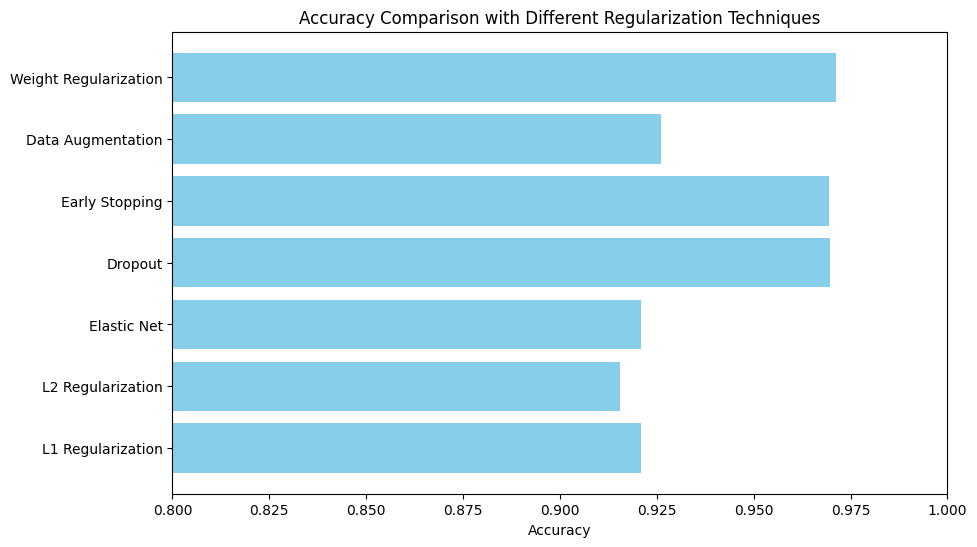

In [9]:
# Plot the comparison of accuracies
methods = ['L1 Regularization', 'L2 Regularization', 'Elastic Net', 'Dropout', 'Early Stopping', 'Data Augmentation', 'Weight Regularization']
accuracies = [l1_accuracy, l2_accuracy, elastic_net_accuracy, dropout_accuracy, early_stopping_accuracy, data_augmentation_accuracy, weight_regularization_accuracy]

plt.figure(figsize=(10, 6))
plt.barh(methods, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison with Different Regularization Techniques')
plt.xlim(0.8, 1.0)
plt.show()